In [1]:
# %load init_ipynb
import os
import sys
import matplotlib.pyplot as pl

sys.path.insert(0, '../code')
# assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {
           'font.size': 20,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'xtick.direction': 'in',
           'ytick.direction': 'in',
           'xtick.color':'black',
           'ytick.color':'black',
           'xtick.major.width':3,
           'ytick.major.width':3,
           'xtick.major.size':10,
           'ytick.major.size':10,
           'xtick.minor.width':1,
           'ytick.minor.width':1,
           'xtick.minor.size':6,
           'ytick.minor.size':6,
           'axes.labelsize': 16,
           'axes.labelcolor':'black',
           'axes.labelcolor':'black',
           'axes.spines.top':True,
           'axes.spines.right':True,
           'axes.linewidth':3,
           'axes.edgecolor':'black',
           'figure.facecolor':'none',
           'legend.facecolor':'none',
           'legend.fontsize': 16,
           'text.color':'black',
           'pdf.fonttype': 42,
           #'text.usetex': False,
           }
pl.rcParams.update(plotpar)

In [2]:
from catalog import CatalogDownloader

#melange-1
cd1 = CatalogDownloader(catalog_name="Tofflemire2021", catalog_type="cluster")
tabs1 = cd1.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/161/171
{'J/AJ/161/171/table7': 'The HD110082 neighborhood--MELANGE-1 candidates'}


In [3]:
tabs1[0][:5]

Gaia,RAJ2000,DEJ2000,Gmag,Bp-Rp,f_Bp-Rp,RUWE,Voff,Dist,Vcand,RVel,r_RVel,l_EWLi,EWLi,r_EWLi,Prot,f_Prot,fNUV_fJ,W1-W3,Note
,deg,deg,mag,mag,,,km / s,pc,km / s,km / s,,,0.1 nm,,d,,,mag,
int64,float64,float64,float32,float32,str1,float32,float32,float32,float32,float32,uint8,str1,float32,uint8,float32,str1,float32,float32,str14
5765748511163751936,192.5893,-88.1211,9.12,0.68,,1.079,0.00,0.0,3.6,3.63,1,,0.090,1,2.3,,--,0.02,HD 110082
5765748511163760640,192.9372,-88.1092,16.40,2.83,,1.082,0.06,0.6,3.6,--,--,,--,--,0.8,,--,--,Wide Companion
4619368443610283136,48.1903,-81.2354,15.62,3.25,a,3.535,0.14,22.1,5.8,--,--,,--,--,--,,--,0.39,
4619046943834660864,55.6668,-82.0326,14.74,2.27,,1.246,0.29,17.4,5.7,--,--,,--,--,--,,--,0.26,
5775823812950658432,247.2398,-78.9273,20.43,2.38,a,1.026,0.50,19.4,1.4,--,--,,--,--,--,,--,--,


In [4]:
df1 = tabs1[0].to_pandas()
df1.head()

,Gaia,RAJ2000,DEJ2000,Gmag,Bp-Rp,f_Bp-Rp,RUWE,Voff,Dist,Vcand,RVel,r_RVel,l_EWLi,EWLi,r_EWLi,Prot,f_Prot,fNUV_fJ,W1-W3,Note
0,5765748511163751936,192.5893,-88.1211,9.12,0.68,,1.079,0.00,0.0,3.6,3.63,1,,0.09,1,2.3,,NaN,0.02,HD 110082
1,5765748511163760640,192.9372,-88.1092,16.40,2.83,,1.082,0.06,0.6,3.6,NaN,<NA>,,NaN,<NA>,0.8,,NaN,NaN,Wide Companion
2,4619368443610283136,48.1903,-81.2354,15.62,3.25,a,3.535,0.14,22.1,5.8,NaN,<NA>,,NaN,<NA>,NaN,,NaN,0.39,
3,4619046943834660864,55.6668,-82.0326,14.74,2.27,,1.246,0.29,17.4,5.7,NaN,<NA>,,NaN,<NA>,NaN,,NaN,0.26,
4,5775823812950658432,247.2398,-78.9273,20.43,2.38,a,1.026,0.50,19.4,1.4,NaN,<NA>,,NaN,<NA>,NaN,,NaN,NaN,


In [5]:
df1 = df1.rename({'RAJ2000': 'ra',
                 'DEJ2000': 'dec',
               }, axis=1)

Text(0.5, 1.0, 'Melange-1')

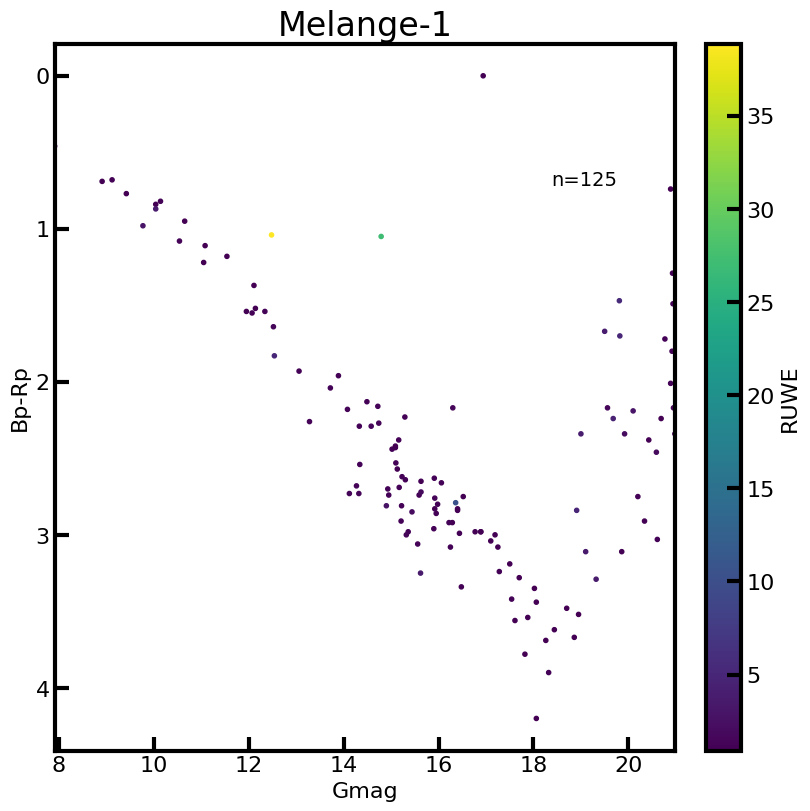

In [6]:
from catalog import plot_cmd

ax=plot_cmd(df1, xaxis='Gmag', yaxis='Bp-Rp', color='RUWE')
ax.set_title("Melange-1")

In [7]:
#melange-2
cd2 = CatalogDownloader(catalog_name="Newton2022", catalog_type="cluster")
tabs2 = cd2.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/164/115
{'J/AJ/164/115/table10': 'Friends of MELANGE-2',
 'J/AJ/164/115/table11': 'Rotation periods for MELANGE-2 friends',
 'J/AJ/164/115/table5': 'Combined Group-X members',
 'J/AJ/164/115/table6': 'Rotation periods for Group-X members',
 'J/AJ/164/115/table7': 'Li EW measurements for candidate Group-X members',
 'J/AJ/164/115/table9': '*Provenance of data for transiting planets in '
                        'associations <1Gyr in age, plotted in Figure 13'}


In [8]:
#group X
df2 = tabs2[0].to_pandas()
df2.head()

,Gaia,TIC,RA_ICRS,DE_ICRS,pmRA,pmDE,plx,RUWE,Gmag,RFG,BP-RP,RFBP,RFRP,cstar,Tmag,cont,tang_,furn_,friends,voff
0,4034556767349900032,365967521,178.948762,39.073361,-20.853001,-9.705,9.317,0.98,10.083,4671,0.855,3518,4259,-0.0018,9.62658,0.000,True,False,False,NaN
1,1536085299544341888,21573379,181.613103,40.057116,-17.601999,-9.850,9.951,1.33,15.153,2481,2.638,264,758,0.0125,13.92480,0.000,True,False,False,NaN
2,1532033908433815552,376690520,187.799132,38.782755,-16.121000,-2.211,9.611,0.89,8.994,6927,0.663,2627,4661,0.0041,8.63192,0.003,True,False,False,NaN
3,1568098405222585600,157878723,191.762020,50.574559,-19.639000,-8.543,10.998,1.10,17.871,725,4.035,15,302,0.0586,16.24910,NaN,True,False,False,NaN
4,1555402481895361664,334518873,193.693209,49.169552,-20.639999,-8.501,11.699,1.11,15.999,1829,2.923,148,730,0.0077,14.68360,0.001,True,False,False,NaN


In [9]:
df2 = df2.rename({'RAJ2000': 'ra',
                  'DEJ2000': 'dec',
                  'plx': 'parallax'
               }, axis=1)

Text(0.5, 1.0, 'Melange-2')

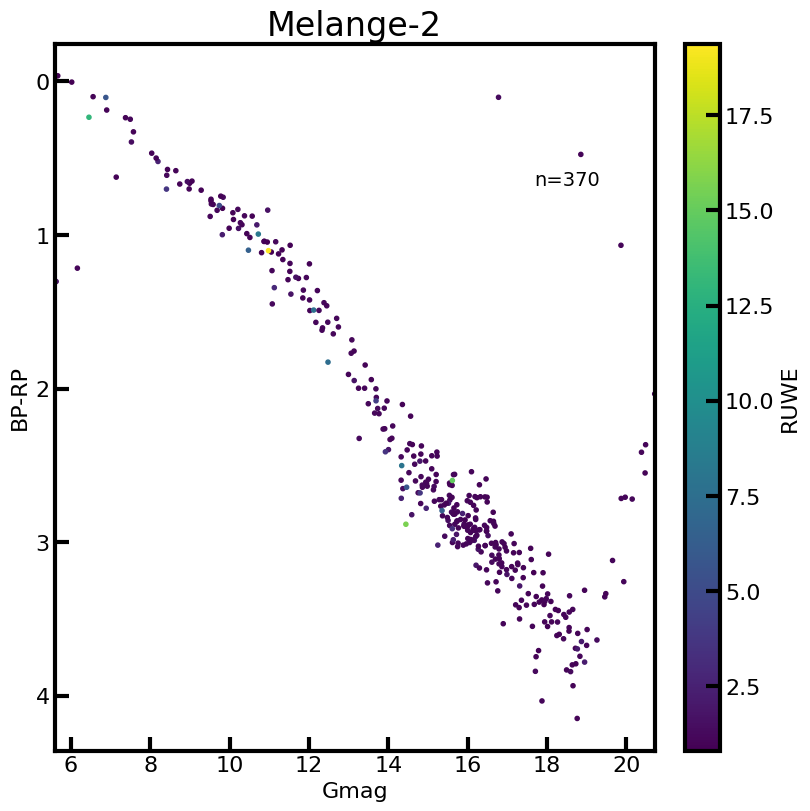

In [10]:
from catalog import plot_cmd

ax=plot_cmd(df2, xaxis='Gmag', yaxis='BP-RP', color='RUWE')
ax.set_title("Melange-2")

In [11]:
#group X
dfx = tabs2[2].to_pandas()
dfx.head()

,Gaia,RA_ICRS,DE_ICRS,BP-RP,B-V,RV-Li,e_RV-Li,Dis_,Det_,EWLi,e_EWLi,Age,b_Age,B_Age,Ens_,SpT,Memb_
0,1404937579808393984,237.791881,52.906974,0.104,0.093,-7.920000,0.48,1,0,NaN,NaN,NaN,NaN,<NA>,0,A3.3,0
1,1600815335778533888,228.241172,56.046432,0.246,0.209,16.600000,2.49,1,0,NaN,NaN,NaN,NaN,<NA>,0,A7.1,1
2,1400123058908995456,241.783933,49.083080,0.328,0.299,-7.090000,0.28,1,0,NaN,NaN,NaN,NaN,<NA>,0,A9.5,1
3,1614381144601686528,224.123275,59.379902,0.499,0.600,-5.050000,0.15,0,0,30.799999,47.799999,NaN,NaN,<NA>,0,F2.5,1
4,1408527485273660416,251.619145,47.005084,0.649,0.519,-26.280001,0.06,0,1,79.800003,6.000000,3161.0,553.0,9079,0,F6.6,0


In [12]:
#query Teff
import warnings
warnings.simplefilter("ignore", category="UnitsWarning")
from catalog import Target

t = Target(ra_deg=166.95421, dec_deg=-58.65578)
t.query_vizier_param('Gmag').get('I/355/gaiadr3')

Found 18 references in Vizier with `Gmag`.


np.float64(17.088577)

In [13]:
try:
    import swifter
except:
    !{sys.executable} -m pip install swifter==1.3.4
    import swifter
assert swifter.__version__ == "1.3.4"

In [14]:
def get_vizier_param(df_coords, param='Gmag', key='I/355/gaiadr3'):
    """if Gaia DR3 is not available,
    try key='I/345/gaia2'
    """
    return df_coords.swifter.apply(lambda coord: Target(*coord, verbose=False)\
            .query_vizier_param(param)\
            .get(key), axis=1)

In [ ]:
#this cell may take more than 5 minutes for the 1st run
import warnings
warnings.simplefilter("ignore", category="UnitsWarning")

coords = ['RA_ICRS','DE_ICRS']
dfx['Gmag'] = get_vizier_param(dfx[coords], param='Gmag')
dfx.head()

Text(0.5, 1.0, 'Group X')

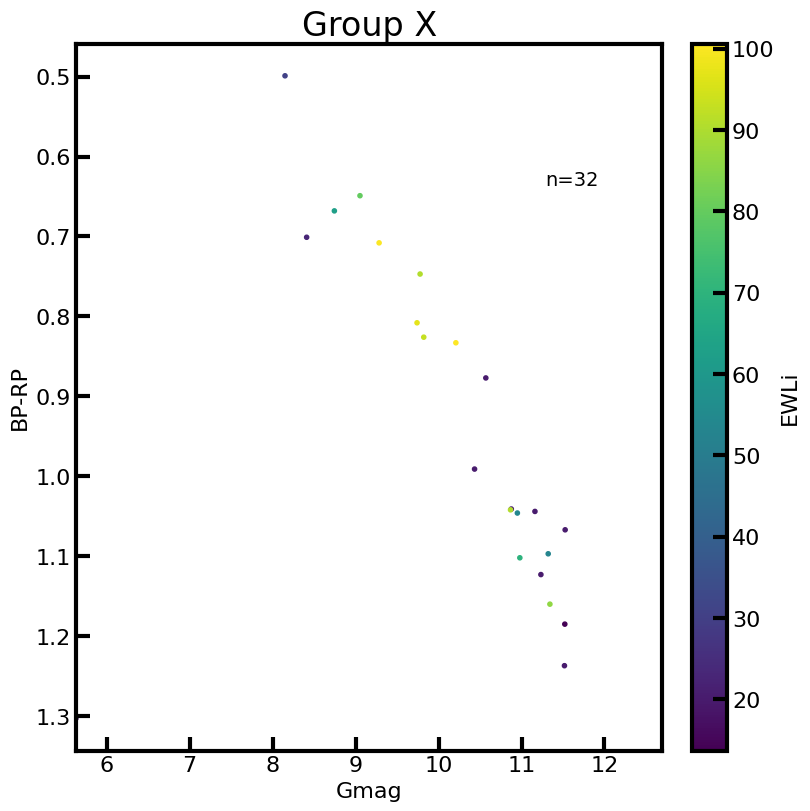

In [16]:
from catalog import plot_cmd

ax=plot_cmd(dfx, xaxis='Gmag', yaxis='BP-RP', color='EWLi')
ax.set_title("Group X")

In [27]:
#melange-3
cd3 = CatalogDownloader(catalog_name="Barber2023", catalog_type="cluster")
tabs3 = cd3.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/164/88
{'J/AJ/164/88/table5': 'Candidate members of MELANGE-3'}


In [28]:
df3 = tabs3[0].to_pandas()
df3.head()

,Gaia,RAJ2016,DEJ2016,Gmag,Voff,SpType,TESS_,Kepler_,plx,e_plx,...,e_Prot,r_Prot,l_Li,Li,e_Li,RVel,e_RVel,r_RVel,_RA.icrs,_DE.icrs
0,2052827207364859264,290.44063,38.52357,12.605000,0.000,G7.3,Y,Y,3.057,0.009,...,0.035,"2, 3",,134.0,18.0,-26.090000,0.03,5,290.30207,38.49256
1,2101379205604338688,289.62522,40.70874,14.788000,3.102,K5.3,N,Y,3.015,0.019,...,0.660,3,<,40.0,NaN,-27.150000,0.10,9,289.49239,40.67892
2,2052804323776522624,290.46921,38.20201,18.976999,3.554,M3.9,N,N,3.036,0.172,...,NaN,,,NaN,NaN,NaN,NaN,<NA>,290.32987,38.17096
3,2100939194794324608,289.80783,38.95042,10.829000,0.478,F4.4,Y,N,3.024,0.012,...,NaN,,<,20.0,NaN,-27.030001,0.18,5,289.67056,38.92033
4,2052954995531623040,291.28017,39.20070,14.355000,4.348,K4.7,N,Y,3.055,0.016,...,0.035,"1, 2, 3",,NaN,NaN,NaN,NaN,<NA>,291.14285,39.16847


In [29]:
df3.columns

Index(['Gaia', 'RAJ2016', 'DEJ2016', 'Gmag', 'Voff', 'SpType', 'TESS_',
       'Kepler_', 'plx', 'e_plx', 'Prot', 'e_Prot', 'r_Prot', 'l_Li', 'Li',
       'e_Li', 'RVel', 'e_RVel', 'r_RVel', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [39]:
#melange-4
cd4 = CatalogDownloader(catalog_name="Wood2023", catalog_type="cluster")
tabs4 = cd4.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/165/85
{'J/AJ/165/85/table1': 'Radial velocity measurements of HD 109833',
 'J/AJ/165/85/table5': 'Members of MELANGE-4'}


In [40]:
df4 = tabs4[1].to_pandas()
df4.head()

,Gaia,RAJ2016,DEJ2016,plx,RUWE,Gmag,BP-RP,Ksmag,RVel,e_RVel,Prob,PRot,q_PRot,TIC,HIP,FF,_RA.icrs,_DE.icrs
0,5191257980618688640,165.73321,-84.4853,14.69,1.275,16.146000,3.615,11.707,NaN,NaN,0.8341,0.23,2,369868288,<NA>,True,165.75364,-84.3990
1,5197565359135041024,163.94028,-82.2780,12.72,1.104,17.506001,4.564,12.457,NaN,NaN,0.8091,NaN,<NA>,394877114,<NA>,False,163.91612,-82.1924
2,5199300461500141312,161.32275,-79.3248,9.79,1.155,14.809000,2.978,10.839,16.468,3.294,0.7692,1.00,2,394806010,<NA>,True,161.26867,-79.2404
3,5200395815602796672,173.48619,-78.1232,13.94,4.722,17.937000,4.576,12.191,NaN,NaN,0.8370,1.72,3,356676344,<NA>,False,173.32962,-78.0347
4,5204523004293421696,160.38705,-76.0405,12.87,1.409,14.123000,2.873,10.231,14.954,3.270,0.9339,0.79,0,453808153,<NA>,True,160.30220,-75.9566


In [41]:
df4 = df4.rename({'RAJ2000': 'ra',
                  'DEJ2000': 'dec',
                  'plx': 'parallax'
               }, axis=1)

Text(0.5, 1.0, 'Melange-4')

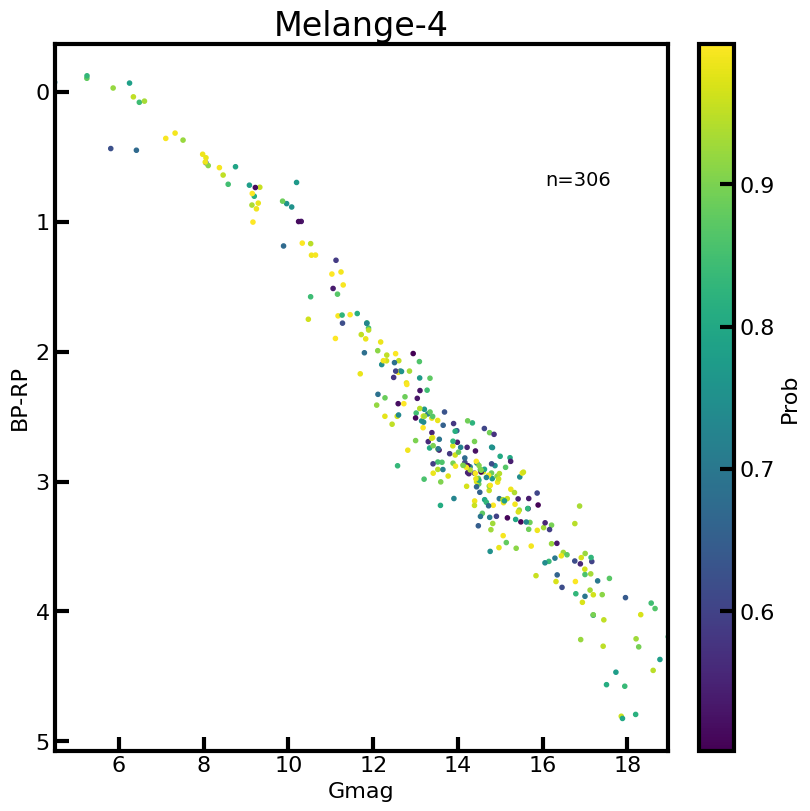

In [42]:
from catalog import plot_cmd

ax=plot_cmd(df4, xaxis='Gmag', yaxis='BP-RP', color='Prob')
ax.set_title("Melange-4")